# MFE analysis of model predictions

We inspect the models' ability to recapitulate structure of target sequences 

In [1]:
import pandas as pd
import numpy as np
import subprocess
from scipy.stats import spearmanr,pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calculate_MFEs(arr):
    '''
      Given list of sequence strings, return the MFE values of the first 36 nucleotides for each sequence as a list. 
      
      Args:
          arr: a list of strings which are the nucleotide sequences
          
      Returns:
          list of MFE values for each sequence for the first 36 nucleotides. Sequences shorter than 36 are not included
    '''
    
    mfes = []
    for i in range(len(arr)):
        seq = arr[i]
        if (len(seq) > 36):
            seq = seq[:36]
            
        text_file = open("input.txt", "w")
        text_file.write(seq)
        text_file.close()
        
        process = subprocess.Popen(["RNAFold", "input.txt"], stdout=subprocess.PIPE)
        out, err = process.communicate()
        out = out.decode('utf8')
        mfes.append(float(out[out.rfind("(")+1: out.rfind(")")]))
        
    return mfes

## Human HEG 

In [3]:
# import data for human HEGs
human_targets = pd.read_csv("outputs/predictions/human_test_split_lang.txt", header=None).iloc[:, 0]
human_unigram = pd.read_csv("outputs/predictions/human_unigram.txt", header=None).iloc[:, 0]
human_trigram = pd.read_csv("outputs/predictions/human_trigram.txt", header=None).iloc[:, 0]
human_fivegram = pd.read_csv("outputs/predictions/human_fivegram.txt", header=None).iloc[:, 0]
human_ngram = pd.read_csv("outputs/predictions/human_equally_weighted_ngram.txt", header=None).iloc[:, 0]
human_rnn = pd.read_csv("outputs/predictions/human_rnn_bilstm_output.txt", header=None).iloc[:, 0]

In [4]:
human_target_MFEs = calculate_MFEs(human_targets)
human_unigram_MFEs = calculate_MFEs(human_unigram)
human_trigram_MFEs = calculate_MFEs(human_trigram)
human_fivegram_MFEs = calculate_MFEs(human_fivegram)
human_ngram_MFEs = calculate_MFEs(human_ngram)
human_rnn_MFEs = calculate_MFEs(human_rnn)

In [5]:
spearmanr(human_target_MFEs, human_unigram_MFEs)

SpearmanrResult(correlation=0.4938834387787101, pvalue=9.718083173738475e-48)

In [6]:
spearmanr(human_target_MFEs, human_ngram_MFEs)

SpearmanrResult(correlation=0.6011003147398563, pvalue=1.8817287892594661e-75)

In [7]:
spearmanr(human_target_MFEs, human_rnn_MFEs)

SpearmanrResult(correlation=0.6664460455058434, pvalue=3.072916121332411e-98)

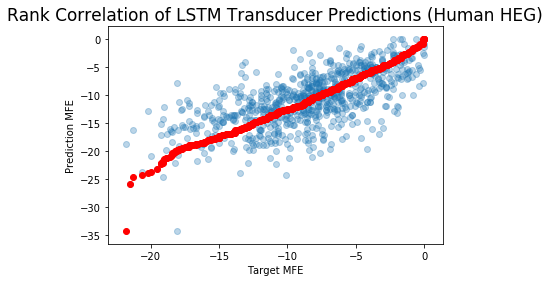

In [8]:
plt.scatter(human_target_MFEs, human_rnn_MFEs, alpha=0.3)
plt.scatter(sorted(human_target_MFEs), sorted(human_rnn_MFEs), c="red")
plt.xlabel("Target MFE")
plt.ylabel("Prediction MFE")

plt.title("Rank Correlation of LSTM Transducer Predictions (Human HEG)", fontsize=17)
plt.show()

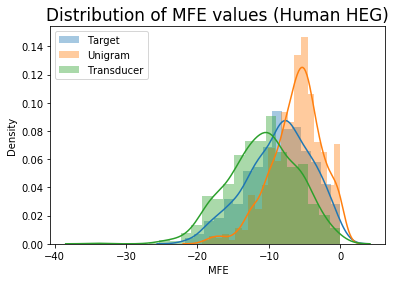

In [9]:
sns.distplot(human_target_MFEs, label="Target")
sns.distplot(human_unigram_MFEs, label="Unigram")
sns.distplot(human_rnn_MFEs, label="Transducer")
plt.legend()
plt.xlabel("MFE")
plt.ylabel("Density")
plt.title("Distribution of MFE values (Human HEG)", fontsize=17)
plt.show()

## E. coli HEGs

In [10]:
# import data for E. coli HEGs

ecoli_targets = pd.read_csv("outputs/predictions/ecoli_heg_test_iterator_baseline.txt", header=None).iloc[:, 0]
ecoli_unigram = pd.read_csv("outputs/predictions/ecoli_heg_unigram.txt", header=None).iloc[:, 0]
ecoli_trigram = pd.read_csv("outputs/predictions/ecoli_heg_trigram.txt", header=None).iloc[:, 0]
ecoli_fivegram = pd.read_csv("outputs/predictions/ecoli_heg_fivegram.txt", header=None).iloc[:, 0]
ecoli_ngram = pd.read_csv("outputs/predictions/ecoli_heg_equally_weighted_ngram.txt", header=None).iloc[:, 0]
ecoli_rnn = pd.read_csv("outputs/predictions/ecoli_heg_rnn_bilstm_output.txt", header=None).iloc[:, 0]

In [11]:
ecoli_target_MFEs = calculate_MFEs(ecoli_targets)
ecoli_unigram_MFEs = calculate_MFEs(ecoli_unigram)
ecoli_trigram_MFEs = calculate_MFEs(ecoli_trigram)
ecoli_fivegram_MFEs = calculate_MFEs(ecoli_fivegram)
ecoli_ngram_MFEs = calculate_MFEs(ecoli_ngram)
ecoli_rnn_MFEs = calculate_MFEs(ecoli_rnn)

In [12]:
spearmanr(ecoli_target_MFEs, ecoli_unigram_MFEs)

SpearmanrResult(correlation=0.6523678021897623, pvalue=2.1396654622466873e-07)

In [13]:
spearmanr(ecoli_target_MFEs, ecoli_ngram_MFEs)

SpearmanrResult(correlation=0.6086110111271713, pvalue=2.1566528471781537e-06)

In [14]:
spearmanr(ecoli_target_MFEs, ecoli_rnn_MFEs)

SpearmanrResult(correlation=0.7140140483876919, pvalue=4.044544011968332e-09)

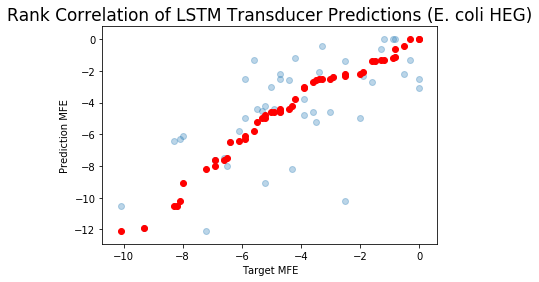

In [15]:
plt.scatter(ecoli_target_MFEs, ecoli_rnn_MFEs, alpha=0.3)
plt.scatter(sorted(ecoli_target_MFEs), sorted(ecoli_rnn_MFEs), c="red")
plt.xlabel("Target MFE")
plt.ylabel("Prediction MFE")

plt.title("Rank Correlation of LSTM Transducer Predictions (E. coli HEG)", fontsize=17)
plt.show()

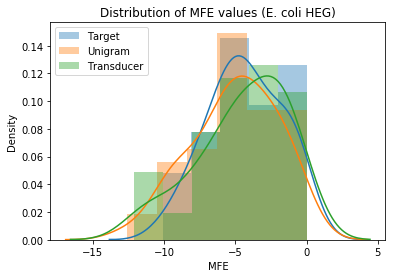

In [16]:
sns.distplot(ecoli_target_MFEs, label="Target")
sns.distplot(ecoli_unigram_MFEs, label="Unigram")
sns.distplot(ecoli_rnn_MFEs, label="Transducer")
plt.legend()
plt.xlabel("MFE")
plt.ylabel("Density")
plt.title("Distribution of MFE values (E. coli HEG)")
plt.show()